# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256

OPTIMIZERS = ["SGD", "RMSprop", "Adagrad", "Adam"]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for name in OPTIMIZERS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("optimizer: {0}".format(name))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    if name == 'SGD':
        optimizer = keras.optimizers.SGD()
    elif name == 'RMSprop':
        optimizer = keras.optimizers.RMSprop()
    elif name == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad()
    else:
        optimizer = keras.optimizers.Adam()

    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "optimizer-{0}".format(name)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

optimizer: SGD
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 150us/step - loss:

50000/50000 [==============================] - 7s 143us/step - loss: 1.2911 - acc: 0.5486 - val_loss: 1.4414 - val_acc: 0.4881
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.2885 - acc: 0.5498 - val_loss: 1.4773 - val_acc: 0.4731
optimizer: RMSprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_____________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.9643 - acc: 0.2996 - val_loss: 1.8411 - val_acc: 0.3456
Epoch 2/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.7510 - acc: 0.3768 - val_loss: 1.7048 - val_acc: 0.3869
Epoch 3/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.6651 - acc: 0.4092 - val_loss: 1.6184 - val_acc: 0.4218
Epoch 4/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5992 - acc: 0.4338 - val_loss: 1.5928 - val_acc: 0.4300
Epoch 5/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.5526 - acc: 0.4510 - val_loss: 1.5503 - val_acc: 0.4497
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5120 - acc: 0.4619 - val_loss: 1.5057 - val_acc: 0.4686
Epoch 7/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4781 - acc: 0.4745 - val_loss: 1.5

50000/50000 [==============================] - 11s 211us/step - loss: 1.7507 - acc: 0.3776 - val_loss: 1.7293 - val_acc: 0.3868
Epoch 3/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6568 - acc: 0.4130 - val_loss: 1.6215 - val_acc: 0.4228
Epoch 4/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5880 - acc: 0.4335 - val_loss: 1.5817 - val_acc: 0.4401
Epoch 5/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5383 - acc: 0.4540 - val_loss: 1.5145 - val_acc: 0.4694
Epoch 6/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.5027 - acc: 0.4678 - val_loss: 1.5070 - val_acc: 0.4672
Epoch 7/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.4694 - acc: 0.4787 - val_loss: 1.5330 - val_acc: 0.4580
Epoch 8/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.4576 - acc: 0.4815 - val_loss: 1.4605 - val_acc: 0.4854
Epoch 9/50
50000/50000 [==============

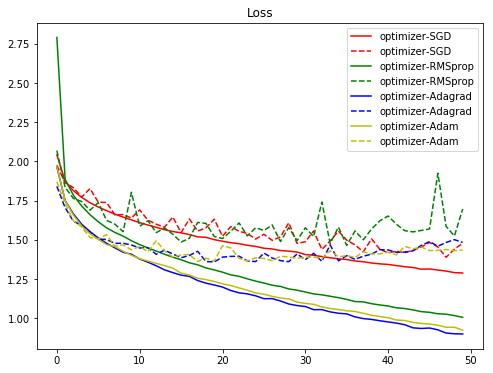

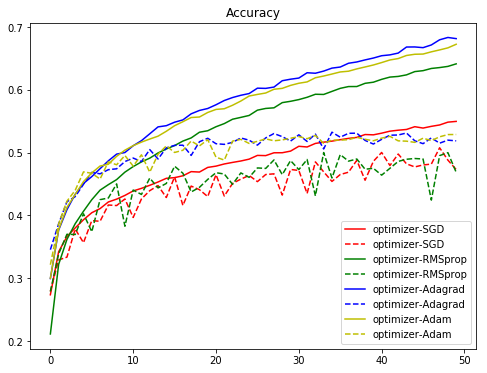

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()